In [127]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [128]:
df = pd.read_csv('medical_examination.csv')
df.head(5)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [129]:
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2 )).apply(lambda x : 1 if x > 25 else 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [130]:
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x : 0 if x == 1 else 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [131]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


pd.melt: Esta función se utiliza para transformar o remodelar un DataFrame. Es útil para convertir DataFrames de formato ancho a formato largo123.
df: Es el DataFrame que quieres remodelar.
id_vars=['cardio']: Aquí, ‘cardio’ es la variable de identificación. Las variables de identificación son las que quieres mantener en el DataFrame remodelado123.
value_vars= ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight']: Estas son las variables medidas que quieres despivotar al eje de las filas123.
Por lo tanto, este código remodela el DataFrame df de tal manera que ‘cardio’ se mantiene como una columna, mientras que las columnas ‘cholesterol’, ‘gluc’, ‘smoke’, ‘alco’, ‘active’ y ‘overweight’ 
se despivotan al eje de las filas. El resultado es un DataFrame con tres columnas: ‘cardio’, ‘variable’ y ‘value’. Cada fila del DataFrame remodelado representa una observación para una combinación específica de ‘cardio’, ‘variable’ y 'value

In [132]:
df_cat['total'] = 1
df_cat


,cardio,variable,value,total
0,0,cholesterol,0,1
1,1,cholesterol,1,1
2,1,cholesterol,1,1
3,1,cholesterol,0,1
4,0,cholesterol,0,1
...,...,...,...,...
419995,0,overweight,1,1
419996,1,overweight,1,1
419997,1,overweight,1,1
419998,1,overweight,1,1


In [133]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index= False).count()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


df_cat['total'] = 1: Esta línea está creando una nueva columna llamada ‘total’ en el DataFrame df_cat y asignando el valor 1 a todas las filas en esta columna. Esto se hace generalmente cuando quieres contar las ocurrencias de las filas después de agruparlas12.

df_cat.groupby(['cardio', 'variable', 'value'], as_index= False).count(): Este es un método de pandas que agrupa los datos en el DataFrame df_cat según las columnas especificadas, que en este caso son ‘cardio’, ‘variable’ y ‘value’. El parámetro as_index=False se utiliza para que los valores de agrupación no se utilicen como índices en el nuevo DataFrame12. Después de agrupar, se aplica la función .count() que cuenta el número de entradas en cada grupo12. Como hemos asignado 1 a todas las filas en la columna ‘total’, el conteo resultante será el número de filas en cada grupo.

Por lo tanto, este código agrupa el DataFrame df_cat por ‘cardio’, ‘variable’ y ‘value’, y luego cuenta el número de entradas en cada grupo. El resultado es un nuevo DataFrame donde cada fila representa un grupo único definido por combinaciones específicas de ‘cardio’, ‘variable’ y ‘value’, y la columna ‘total’ representa el recuento de entradas para cada grupo12

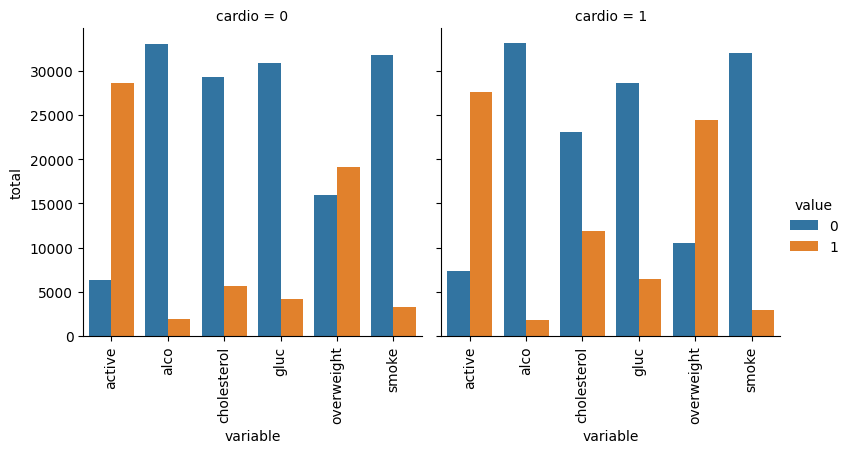

In [134]:
# Create a categorical plot
# value_vars es igual a variable in catplot
# hue corresponde a la separacion de las barras, si no aparece, sale 1 barra por variable
# si aparece hub='value' una misma variable se separa en tantas barras como valores tenga
# col corresponde a cuantos graficos van a ser pintados de acuerdo a los valores que posea ese campo, cardio tiene 0 y 1
# kind es el tipo de cuenta a sacar
g = sns.catplot(x='variable', y="total", hue="value", col="cardio",
                data=df_cat, kind="bar",
                height=4, aspect=1);

# Rotate x-axis labels for readability
g.set_xticklabels(rotation=90)

# Show the plot
plt.show()

In [140]:
# Keep rows where diastolic pressure is not higher than systolic
df_clean = df[df['ap_lo'] <= df['ap_hi']]

# Define lower and upper bounds for height
height_lower = df_clean['height'].quantile(0.025)
height_upper = df_clean['height'].quantile(0.975)

# Keep rows where height is between the 2.5th and 97.5th percentile
df_clean = df_clean[(df_clean['height'] >= height_lower) & (df_clean['height'] <= height_upper)]

# Define lower and upper bounds for weight
weight_lower = df_clean['weight'].quantile(0.025)
weight_upper = df_clean['weight'].quantile(0.975)

# Keep rows where weight is between the 2.5th and 97.5th percentile
df_clean = df_clean[(df_clean['weight'] >= weight_lower) & (df_clean['weight'] <= weight_upper)]

df_clean

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


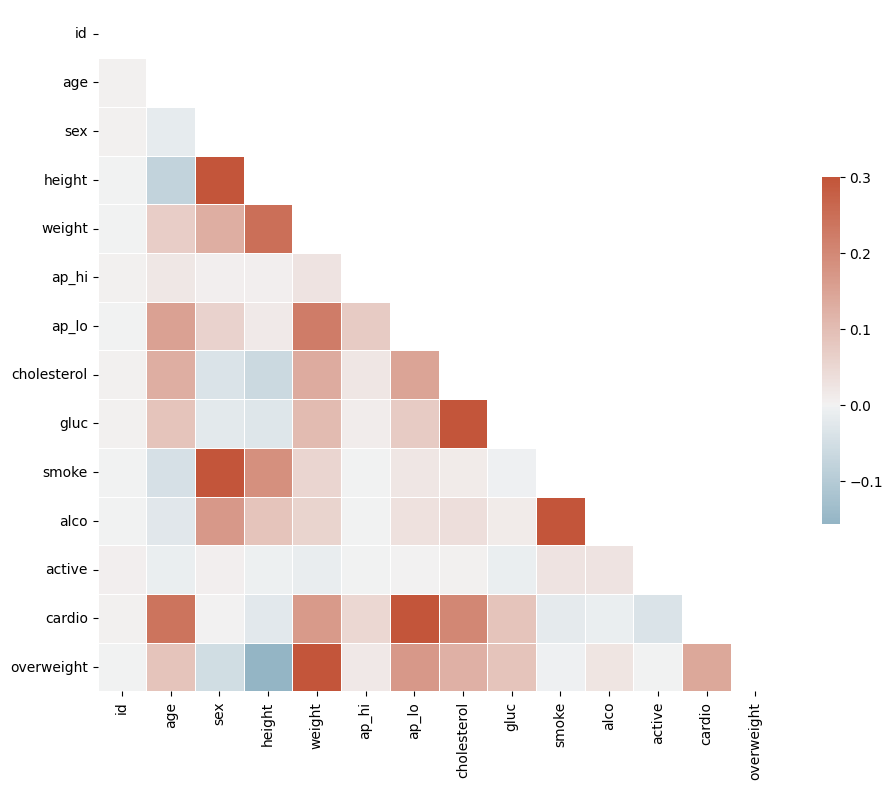

In [137]:
# Assuming 'df' is your DataFrame
# Calculate the correlation matrix
corr_matrix = df_clean.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [141]:
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))
]

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


<Axes: >

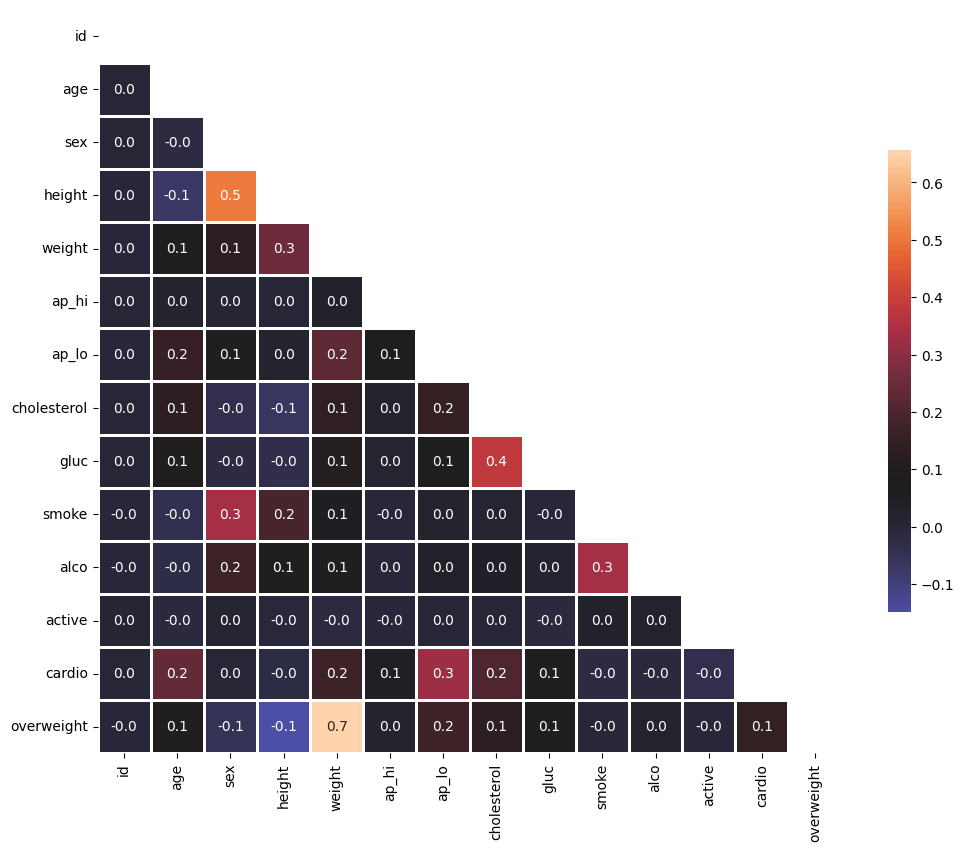

In [146]:
corr = df_heat.corr(method='pearson')
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, linewidths=1, annot= True, square=True, mask=mask, fmt='.1f',
            center=0.08, cbar_kws={'shrink':0.5})